In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

In [6]:
data = pd.read_csv('/Users/sham_sara/Desktop/demand forecasting/dataset/SeoulBikeData.csv', encoding='unicode_escape')
data.head(10)



Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   
5  01/12/2017                100     5             -6.4           37   
6  01/12/2017                181     6             -6.6           35   
7  01/12/2017                460     7             -7.4           38   
8  01/12/2017                930     8             -7.6           37   
9  01/12/2017                490     9             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   
5               1.5              2000                      -18.7   
6               1.3              2000                      -19.5   
7               0.9              2000                      -19.3   
8               1.1              2000                      -19.8   
9               0.5              1928                      -22.4   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00           0.0            0.0  Winter  No Holiday   
1                     0.00           0.0            0.0  Winter  No Holiday   
2                     0.00           0.0            0.0  Winter  No Holiday   
3                     0.00           0.0            0.0  Winter  No Holiday   
4                     0.00           0.0            0.0  Winter  No Holiday   
5                     0.00           0.0            0.0  Winter  No Holiday   
6                     0.00           0.0            0.0  Winter  No Holiday   
7                     0.00           0.0            0.0  Winter  No Holiday   
8                     0.01           0.0            0.0  Winter  No Holiday   
9                     0.23           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
5             Yes  
6             Yes  
7             Yes  
8             Yes  
9             Yes

In [7]:
data.info()
data.describe()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

(8760, 14)

In [8]:
data.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
data.describe(include = "all").T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

# date conversion

In [10]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)


In [11]:
data['Day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data['weekday'] = data['Date'].dt.day_name()


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

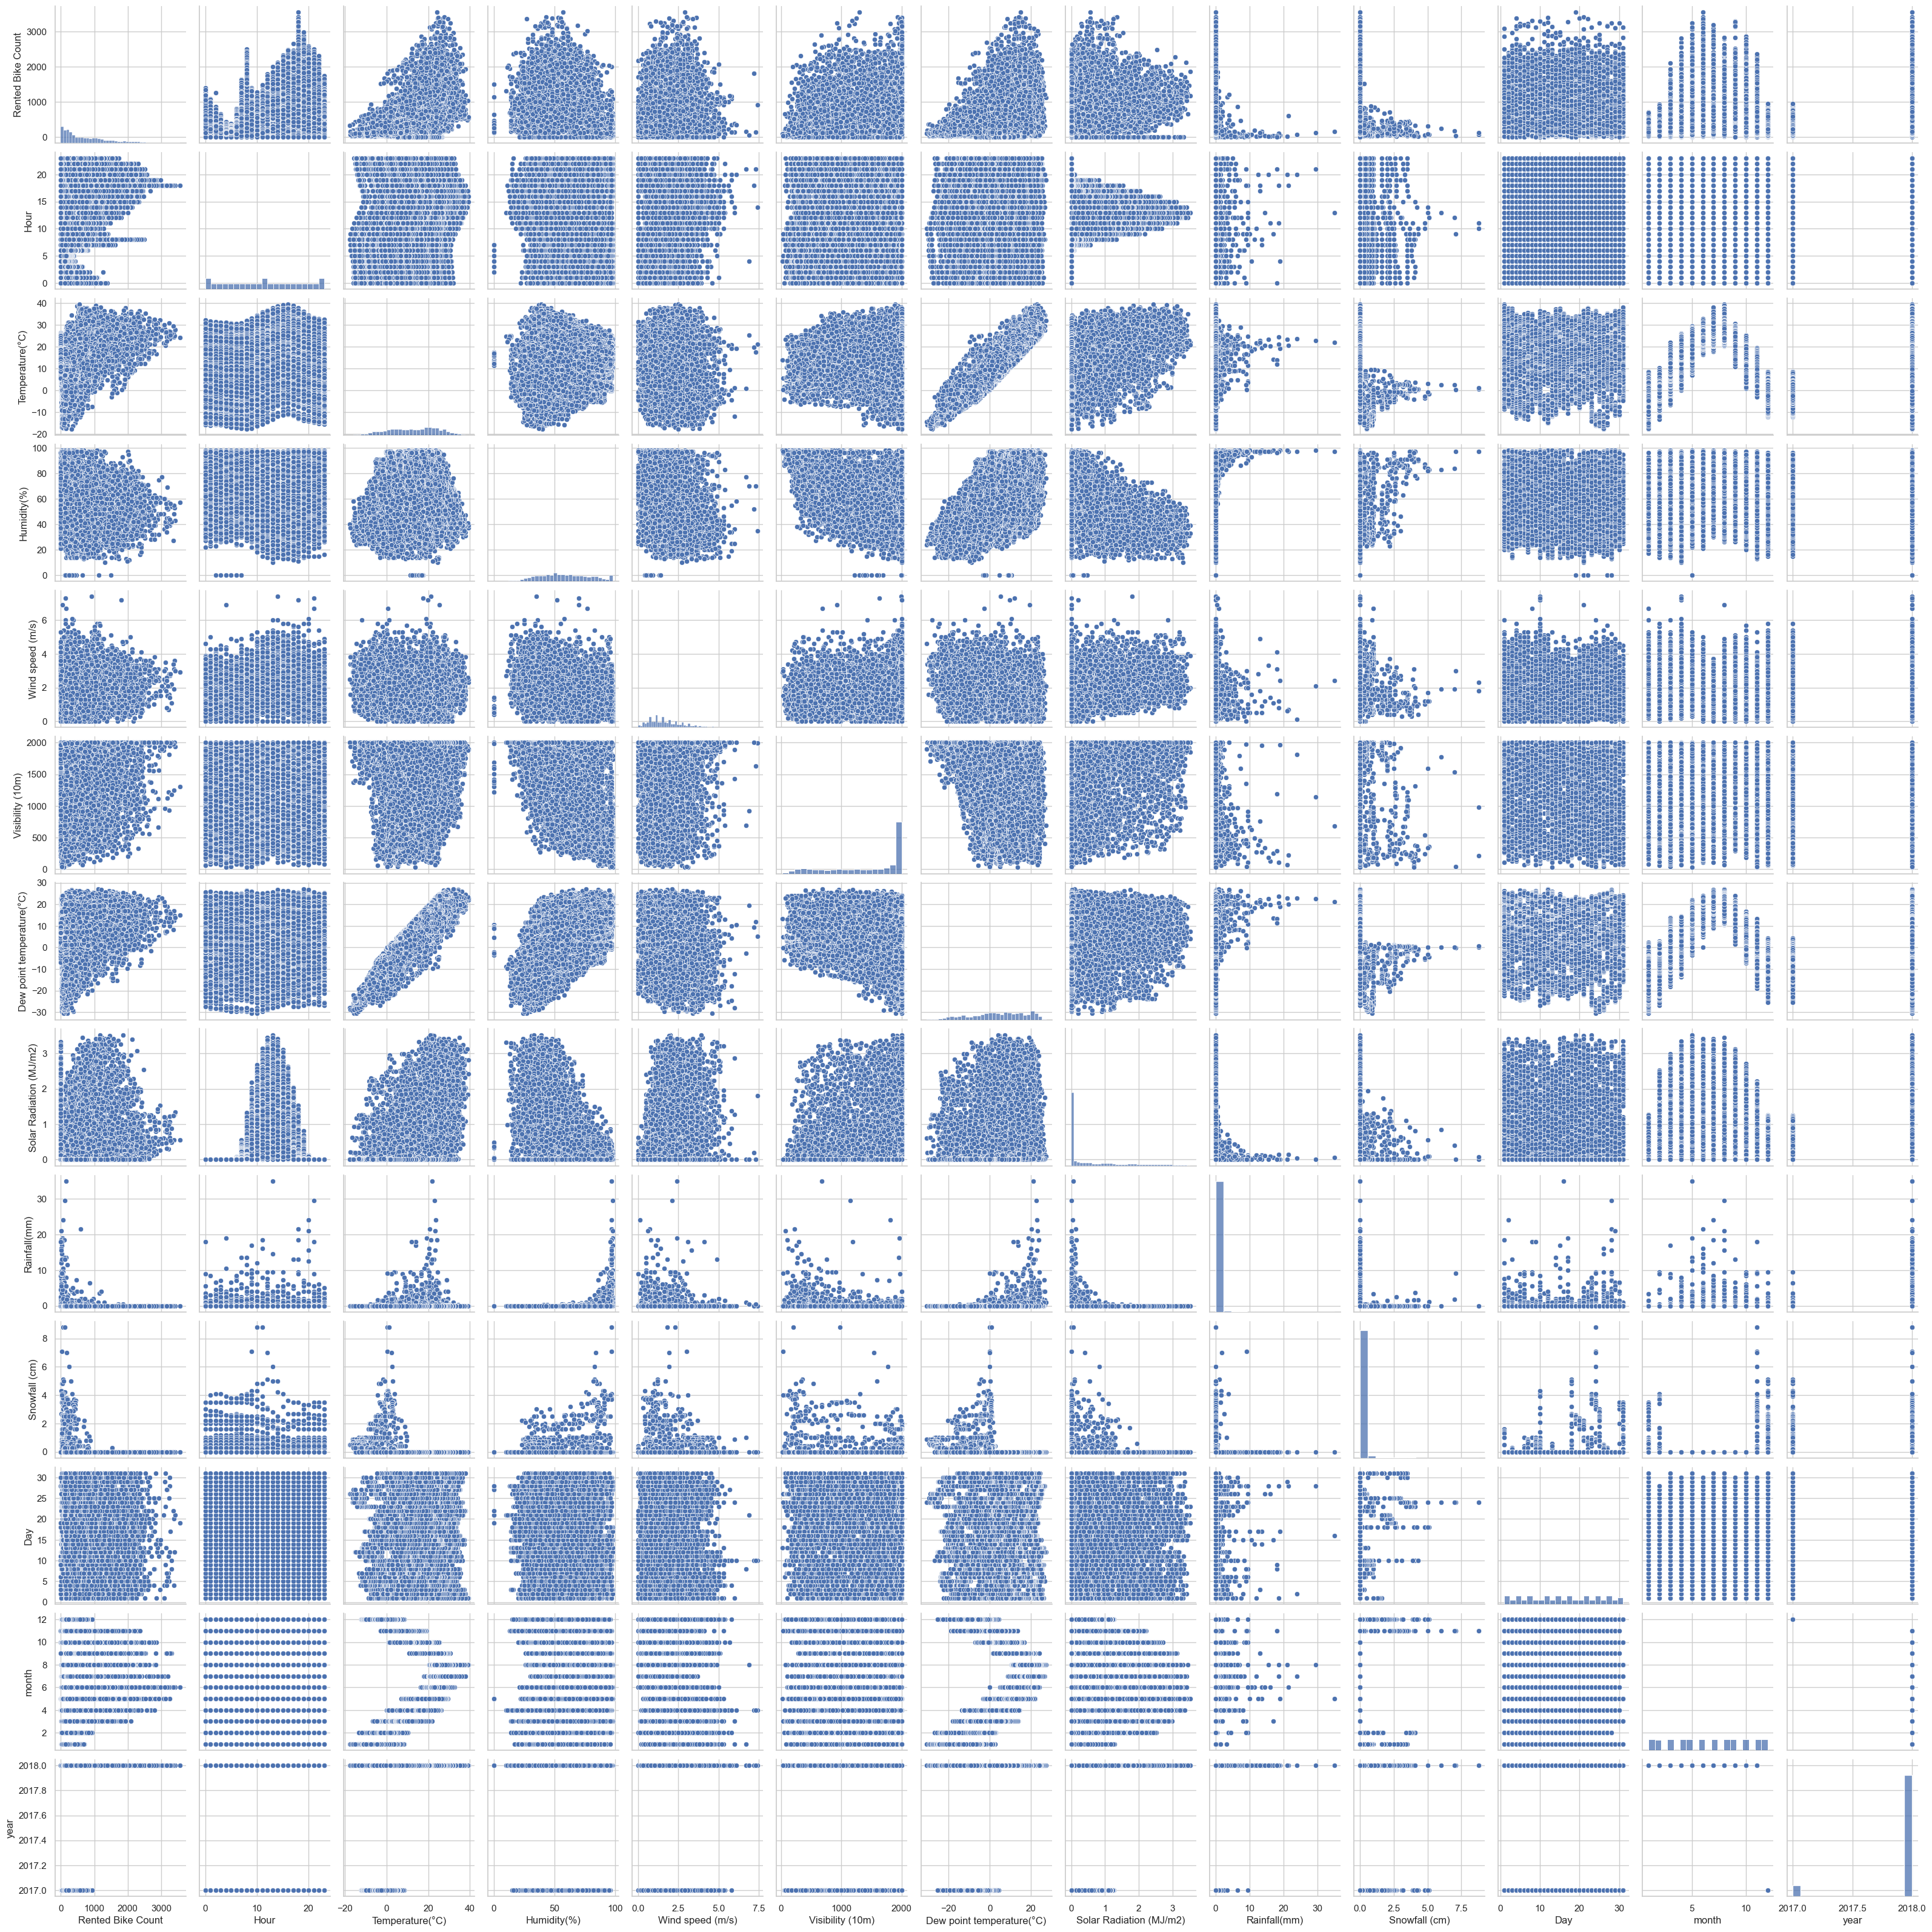

In [13]:
sns.pairplot(data)

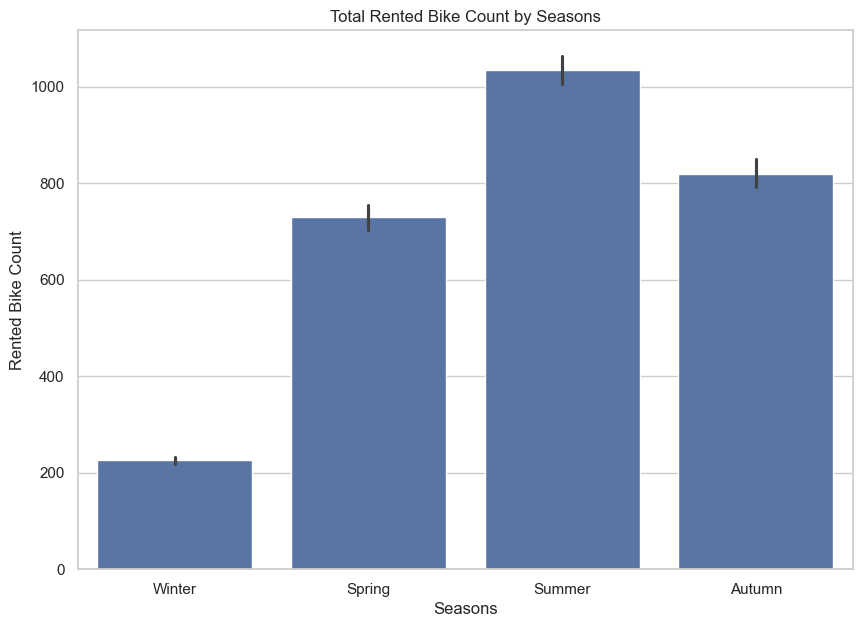

In [14]:

plt.figure(figsize=(10, 7))
sns.barplot(x="Seasons", y="Rented Bike Count", data = data)
plt.title("Total Rented Bike Count by Seasons")

plt.show()

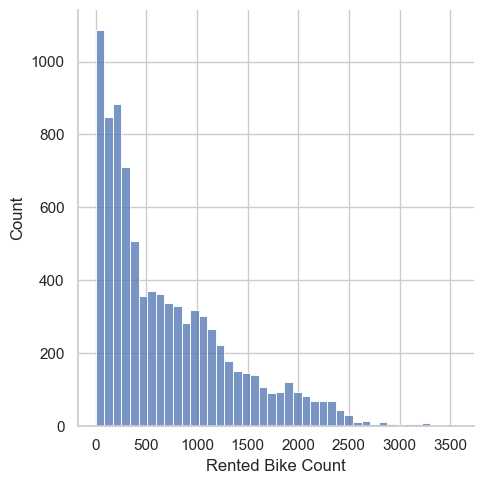

In [15]:
sns.displot(data['Rented Bike Count'])

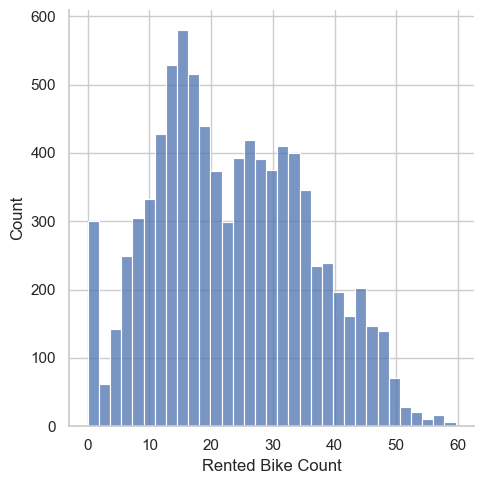

In [16]:
sns.displot(np.sqrt(data['Rented Bike Count']))

# data skew

In [17]:
numeric_skewness = data.select_dtypes(include=['float64', 'int64']).skew().sort_values(ascending=True)
print(numeric_skewness)


Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Hour                          0.000000
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64


# correlation of varaibles

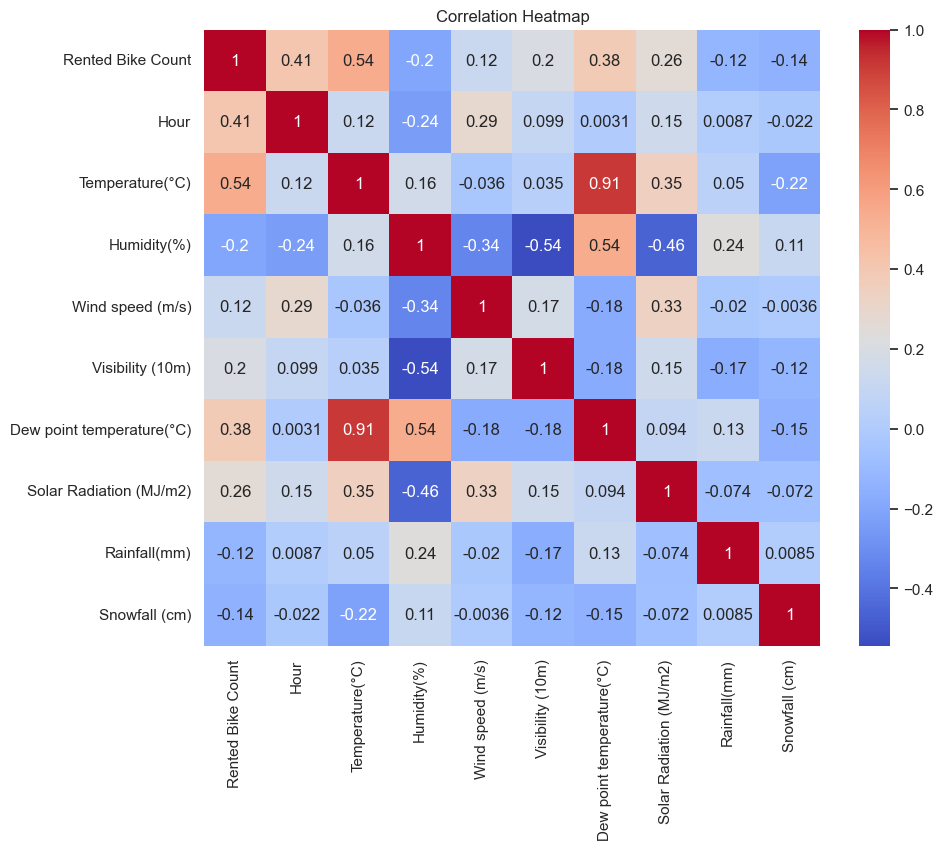

In [18]:

numeric_data = data.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()




In [21]:
X = data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns

X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

                      feature         VIF
0                       const  399.083215
1           Rented Bike Count    1.888828
2                        Hour    1.346027
3             Temperature(°C)   87.570214
4                 Humidity(%)   20.508420
5            Wind speed (m/s)    1.276329
6            Visibility (10m)    1.568061
7   Dew point temperature(°C)  115.713717
8     Solar Radiation (MJ/m2)    2.042764
9                Rainfall(mm)    1.104412
10              Snowfall (cm)    1.095781


# identifying variables to remove based on VIF

In [32]:
def get_vif(df):
    vif = pd.DataFrame()
    vif["variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

In [37]:
not_for_vif = ["month", "Day", "year", "Rented Bike Count", "Dew point temperature(°C)"] #Dew point temperature(°C) remove this from list to see VIF before and after its removal
numeric_columns = data[[col for col in data.describe().columns if col not in not_for_vif]].select_dtypes(include=['float64', 'int64'])

# Add a constant (intercept) to the data for VIF calculation
X = add_constant(numeric_columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                   feature        VIF
0                    const  53.654460
1                     Hour   1.181468
2          Temperature(°C)   1.623991
3              Humidity(%)   2.534083
4         Wind speed (m/s)   1.274067
5         Visibility (10m)   1.556883
6  Solar Radiation (MJ/m2)   1.924897
7             Rainfall(mm)   1.070513
8            Snowfall (cm)   1.090421


In [38]:
data.drop(["Dew point temperature(°C)"], axis = 1, inplace = True)

In [39]:
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0               2.2              2000                      0.0           0.0   
1               0.8              2000                      0.0           0.0   
2               1.0              2000                      0.0           0.0   
3               0.9              2000                      0.0           0.0   
4               2.3              2000                      0.0           0.0   

   Snowfall (cm) Seasons     Holiday Functioning Day  Day  month  year weekday  
0            0.0  Winter  No Holiday             Yes    1     12  2017  Friday  
1            0.0  Winter  No Holiday             Yes    1     12  2017  Friday  
2            0.0  Winter  No Holiday             Yes    1     12  2017  Friday  
3            0.0  Winter  No Holiday             Yes    1     12  2017  Friday  
4            0.0  Winter  No Holiday             Yes    1     12  2017  Friday

# saving data set

In [45]:
data.to_csv('/Users/sham_sara/Desktop/demand forecasting/processed-data/cleaned_data.csv', index=False)  

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   Rented Bike Count        8760 non-null   int64         
 2   Hour                     8760 non-null   int64         
 3   Temperature(°C)          8760 non-null   float64       
 4   Humidity(%)              8760 non-null   int64         
 5   Wind speed (m/s)         8760 non-null   float64       
 6   Visibility (10m)         8760 non-null   int64         
 7   Solar Radiation (MJ/m2)  8760 non-null   float64       
 8   Rainfall(mm)             8760 non-null   float64       
 9   Snowfall (cm)            8760 non-null   float64       
 10  Seasons                  8760 non-null   object        
 11  Holiday                  8760 non-null   object        
 12  Functioning Day          8760 non-